#Importing Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#Data Pre-processing

In [28]:
# Read data from the CSV file
header_names = ['YEAR', 'Rainfall in June']
data = pd.read_csv('/content/data.csv', usecols=header_names)

# Display the number of rows and contents of the DataFrame
print(f"Number of rows: {len(data)}")
print(data.head())

Number of rows: 117
   YEAR  Rainfall in June
0  1901              22.7
1  1902              59.9
2  1903              26.2
3  1904              53.4
4  1905              23.1


In [29]:
statistics = data.describe()

print(f"Mean = {statistics['Rainfall in June'].loc['mean']}")
print(f"Median = {(statistics['Rainfall in June'].loc['50%'])}")
print(f"Standard Deviation = {(statistics['Rainfall in June'].loc['std'])}")

Mean = 72.95752212389381
Median = 69.9
Standard Deviation = 35.968989136749386


In [30]:
data['Rainfall in June'].fillna(data['Rainfall in June'].median(), inplace=True)

In [31]:
data.drop_duplicates(inplace=True)
len(data)

115

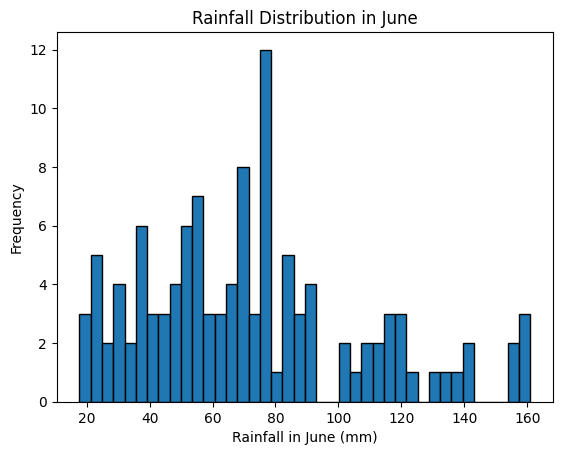

In [32]:
# Create a histogram plot
plt.hist(data['Rainfall in June'], bins=40, edgecolor='black')
plt.xlabel('Rainfall in June (mm)')
plt.ylabel('Frequency')
plt.title('Rainfall Distribution in June')
plt.show()

We can see that histogram is skewed to the RIGHT.

In [33]:
# Standard Scaling
scaler_standard = StandardScaler()
data['YEAR StandardScaled'] = scaler_standard.fit_transform(data[['YEAR']])

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
data['YEAR MinMaxScaled'] = scaler_minmax.fit_transform(data[['Rainfall in June']])

# Reporting the differences in range i.e. max() - min()
original_range = np.ptp(data['YEAR'], axis=0)  # Peak-to-peak (range) of the original data
StandardScaled_range = np.ptp(data['YEAR StandardScaled'], axis=0)
MinMaxScaled_range = np.ptp(data['YEAR MinMaxScaled'], axis=0)

print(f"Original Data Range: {original_range}")
print(f"\nStandard Scaled Data Range: {StandardScaled_range}")
print(f"\nMin-Max Scaled Data Range: {MinMaxScaled_range}")

Original Data Range: 114

Standard Scaled Data Range: 3.4341088288340345

Min-Max Scaled Data Range: 0.9999999999999999


In [34]:
print(f"Original MIN = {data['YEAR'].min()}")
print(f"Original MAX = {data['YEAR'].max()}\n")
print(f"StandardScaled MIN = {data['YEAR StandardScaled'].min()}")
print(f"StandardScaled MAX = {data['YEAR StandardScaled'].max()}\n")
print(f"MinMaxScaled MIN = {data['YEAR MinMaxScaled'].min()}")
print(f"MinMaxScaled MAX = {data['YEAR MinMaxScaled'].max()}")

Original MIN = 1901
Original MAX = 2015

StandardScaled MIN = -1.7170544144170172
StandardScaled MAX = 1.7170544144170172

MinMaxScaled MIN = 0.0
MinMaxScaled MAX = 0.9999999999999999


#Data visualization

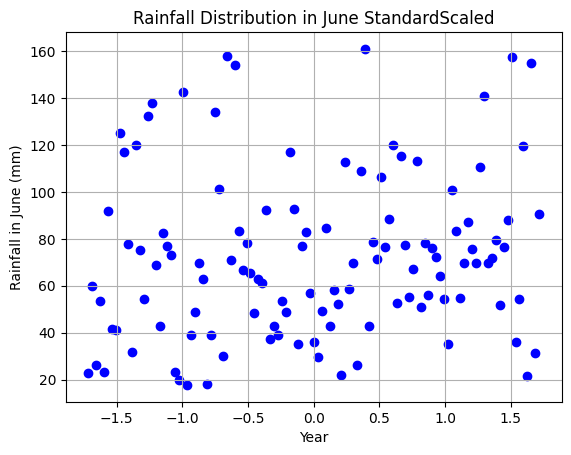

In [35]:
plt.scatter(data['YEAR StandardScaled'], data['Rainfall in June'], color = 'blue')
plt.xlabel('Year')
plt.ylabel('Rainfall in June (mm)')
plt.title('Rainfall Distribution in June StandardScaled')
plt.grid()
plt.show()

#Linear Regression with 80-20 split

In [36]:
X = data[['YEAR StandardScaled']]
y = data['Rainfall in June']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and fit the Linear Regression model
model = LinearRegression().fit(x_train, y_train)

# Evaluate the model
print(f"Mean Squared Error (MSE) of the test data: {metrics.mean_squared_error(y_test, model.predict(x_test))}")
print(f"Mean Absolute Error (MAE) of the test data: {metrics.mean_absolute_error(y_test, model.predict(x_test))}")
print(f"Root Mean Squared Error (RMSE) of the test data: {metrics.mean_squared_error(y_test, model.predict(x_test),squared=False)}")

Mean Squared Error (MSE) of the test data: 1565.2372526417516
Mean Absolute Error (MAE) of the test data: 32.104436059010254
Root Mean Squared Error (RMSE) of the test data: 39.56307941303042


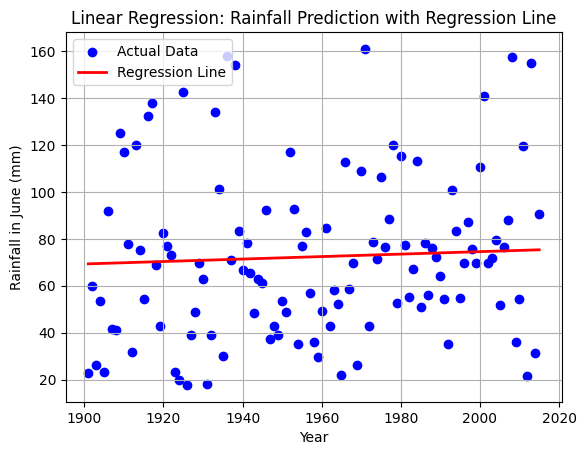

In [37]:
plt.scatter(data['YEAR'], data['Rainfall in June'], color='blue', label='Actual Data')
plt.plot(data['YEAR'], model.predict(data[['YEAR StandardScaled']]), color='red', linewidth=2, label='Regression Line')

plt.xlabel('Year')
plt.ylabel('Rainfall in June (mm)')
plt.title('Linear Regression: Rainfall Prediction with Regression Line')
plt.legend()
plt.grid()
plt.show()

#Linear Regression with 70-30 split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build and fit the Linear Regression model
model = LinearRegression().fit(x_train, y_train)

# Evaluate the model
print(f"Mean Squared Error (MSE) of the test data: {metrics.mean_squared_error(y_test, model.predict(x_test))}")
print(f"Mean Absolute Error (MAE) of the test data: {metrics.mean_absolute_error(y_test, model.predict(x_test))}")
print(f"Root Mean Squared Error (RMSE) of the test data: {metrics.mean_squared_error(y_test, model.predict(x_test),squared=False)}")

Mean Squared Error (MSE) of the test data: 1485.2961896439076
Mean Absolute Error (MAE) of the test data: 32.20619655694001
Root Mean Squared Error (RMSE) of the test data: 38.539540599803566


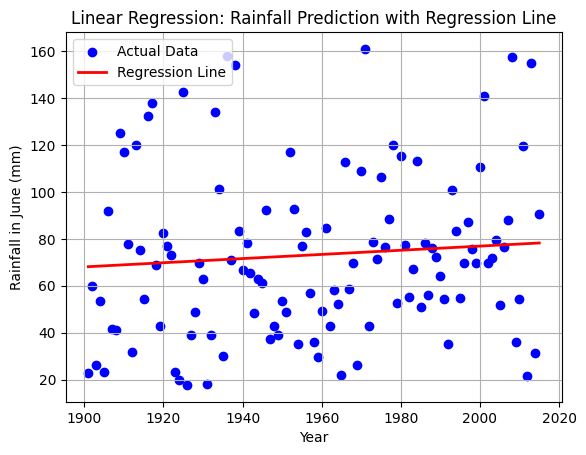

In [39]:
plt.scatter(data['YEAR'], data['Rainfall in June'], color='blue', label='Actual Data')
plt.plot(data['YEAR'], model.predict(data[['YEAR StandardScaled']]), color='red', linewidth=2, label='Regression Line')

plt.xlabel('Year')
plt.ylabel('Rainfall in June (mm)')
plt.title('Linear Regression: Rainfall Prediction with Regression Line')
plt.legend()
plt.grid()
plt.show()